In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
df['Neighborhood'].unique()

array(['Allston', 'Beacon Hill', 'Brighton', 'Downtown', 'Charlestown',
       'Chinatown', 'Dorchester', 'East Boston', 'Fenway', 'Hyde Park',
       'Jamaica Plain', 'Longwood', 'Mattapan', 'North End', 'Roslindale',
       'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End',
       'West End', 'West Roxbury'], dtype=object)

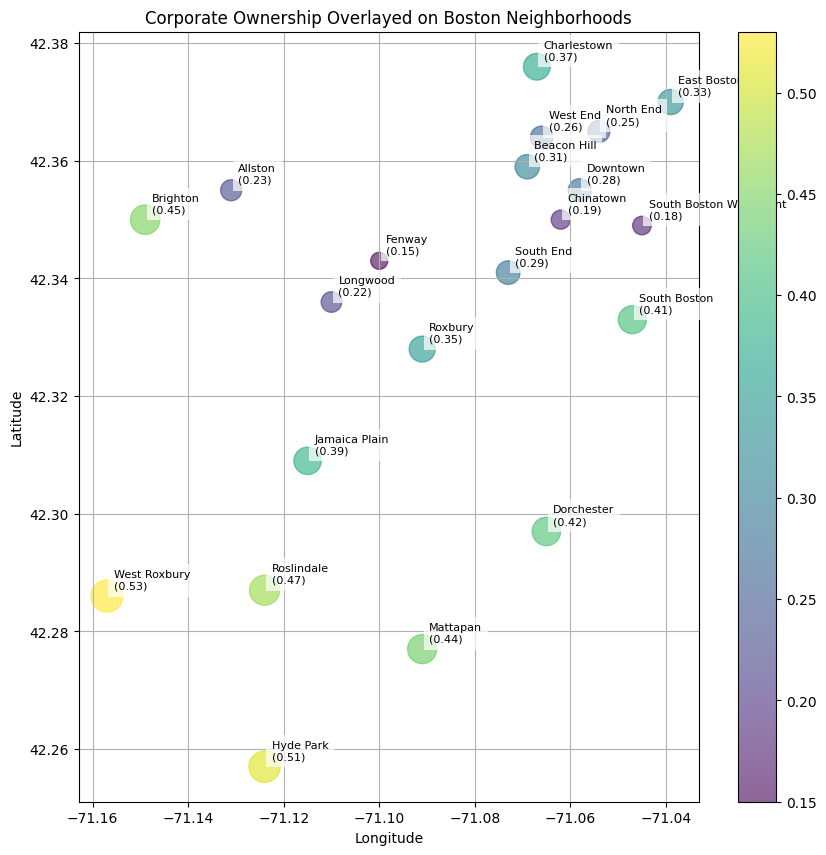

In [7]:
def plot_neighborhood_values(value_dict, save_title, plot_title):
    """
    Plot neighborhoods as scatter points with size based on provided values
    and annotate with neighborhood names and values. Points colored using viridis colormap.
    
    Args:
        value_dict (dict): Dictionary mapping neighborhood names to numeric values
        save_title (str): Filename to save plot as
        plot_title (str): Title to display on plot
    """
    # Coordinates for Boston neighborhoods
    neighborhoods = {
        'Allston': (-71.131, 42.355),
        'Beacon Hill': (-71.069, 42.359), 
        'Brighton': (-71.149, 42.350),
        'Downtown': (-71.058, 42.355),
        'Charlestown': (-71.067, 42.376),
        'Chinatown': (-71.062, 42.350),
        'Dorchester': (-71.065, 42.297),
        'East Boston': (-71.039, 42.370),
        'Fenway': (-71.100, 42.343),
        'Hyde Park': (-71.124, 42.257),
        'Jamaica Plain': (-71.115, 42.309),
        'Longwood': (-71.110, 42.336),
        'Mattapan': (-71.091, 42.277),
        'North End': (-71.054, 42.365),
        'Roslindale': (-71.124, 42.287),
        'Roxbury': (-71.091, 42.328),
        'South Boston': (-71.047, 42.333),
        'South Boston Waterfront': (-71.045, 42.349),
        'South End': (-71.073, 42.341),
        'West End': (-71.066, 42.364),
        'West Roxbury': (-71.157, 42.286)
    }

    # Create lists to store coordinates and sizes
    longs = []
    lats = []
    sizes = []
    names = []
    values = []
    
    # Extract coordinates and values for neighborhoods in value_dict
    for hood, value in value_dict.items():
        if hood in neighborhoods:
            long, lat = neighborhoods[hood]
            longs.append(long)
            lats.append(lat)
            sizes.append(value)
            names.append(hood)
            values.append(value)
    
    # Create plot
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(longs, lats, s=[s*1000 for s in sizes], alpha=0.6, 
                         c=values, cmap='viridis')
    plt.colorbar(scatter)
    
    # Add annotations
    for i in range(len(names)):
        plt.annotate(
            f'{names[i]}\n({values[i]:.2f})',
            (longs[i], lats[i]),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
        )
    
    # Customize plot
    plt.title(f'{plot_title} Overlayed on Boston Neighborhoods')
    plt.xlabel('Longitude') 
    plt.ylabel('Latitude')
    plt.grid(True)
    
    # Save plot
    plt.savefig(f'figs/q2/{save_title}.png')
    plt.show()


plot_neighborhood_values(neighborhoods, save_title = 'corp_owner', plot_title = "Corporate Ownership")

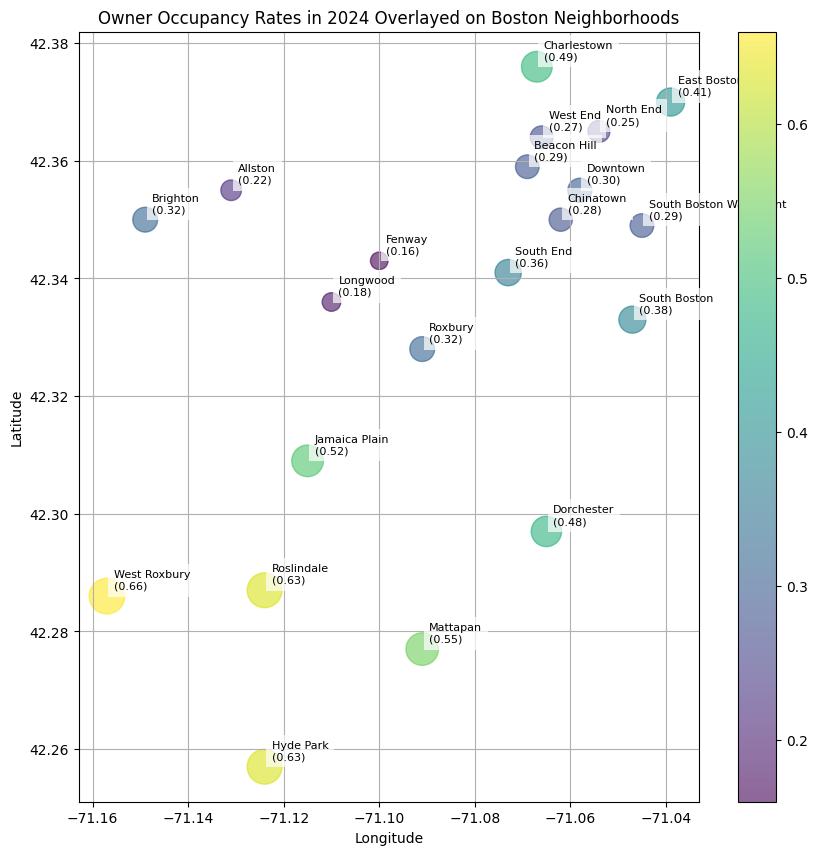

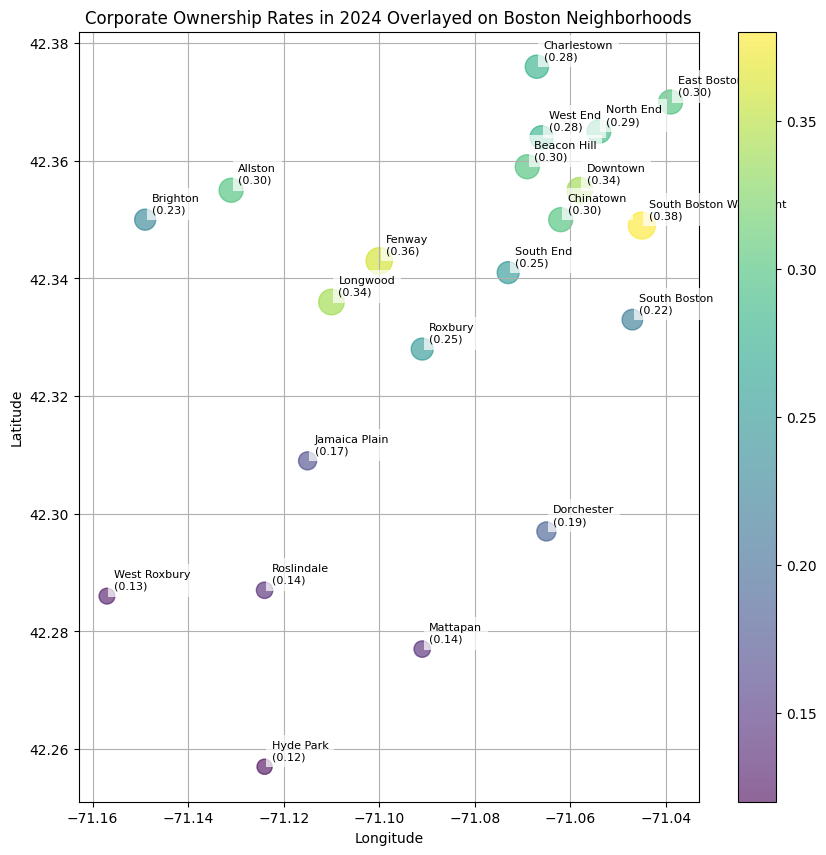

In [11]:
def plot_all(year = 2024):
    # Read data
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    df_year = df[df['Year'] == year]
    
    # Create dictionaries
    own_occ_dict = dict(zip(df_year['Neighborhood'], df_year['own_occ_rate']))
    corp_own_dict = dict(zip(df_year['Neighborhood'], df_year['corp_own_rate']))
    
    # Plot owner occupancy rates
    plot_neighborhood_values(
                           value_dict=own_occ_dict,
                           save_title='owner_occupancy_2024',
                           plot_title='Owner Occupancy Rates in 2024')
    
    # Plot corporate ownership rates  
    plot_neighborhood_values(
                           value_dict=corp_own_dict, 
                           save_title='corporate_ownership_2024',
                           plot_title='Corporate Ownership Rates in 2024')

plot_all()

21


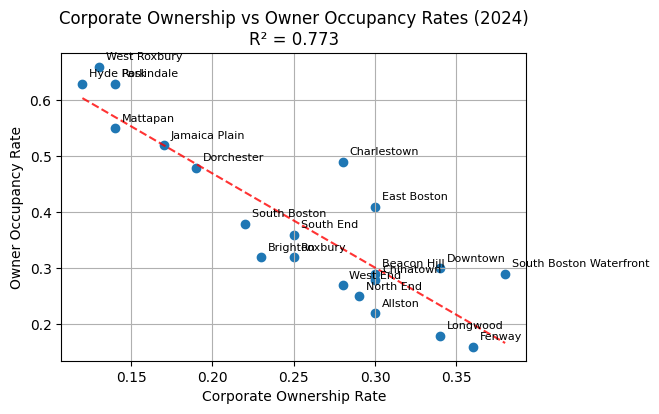

In [ ]:
def plot_corr(year = 2024):
    # Read data
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    df_year = df[df['Year'] == year]
    
    # Create scatter plot
    plt.figure(figsize=(6,4))
    plt.scatter(df_year['corp_own_rate'], df_year['own_occ_rate'])
    
    # Add labels for each point
    for i, txt in enumerate(df_year['Neighborhood']):
        plt.annotate(txt, (df_year['corp_own_rate'].iloc[i], df_year['own_occ_rate'].iloc[i]),
                    xytext=(5,5), textcoords='offset points', fontsize=8)
    
    # Calculate and plot line of best fit
    z = np.polyfit(df_year['corp_own_rate'], df_year['own_occ_rate'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_year['corp_own_rate'].min(), df_year['corp_own_rate'].max(), 100)
    plt.plot(x_line, p(x_line), "r--", alpha=0.8)
    
    # Calculate R-squared
    correlation_matrix = np.corrcoef(df_year['corp_own_rate'], df_year['own_occ_rate'])
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    
    # Add labels and title
    plt.xlabel('Corporate Ownership Rate')
    plt.ylabel('Owner Occupancy Rate') 
    plt.title(f'Corporate Ownership vs Owner Occupancy Rates ({year})\nR² = {r_squared:.3f}')
    plt.grid(True)
    plt.savefig('figs/q2/corr_owner_company.png', dpi = 300)
    plt.show()
plot_corr()

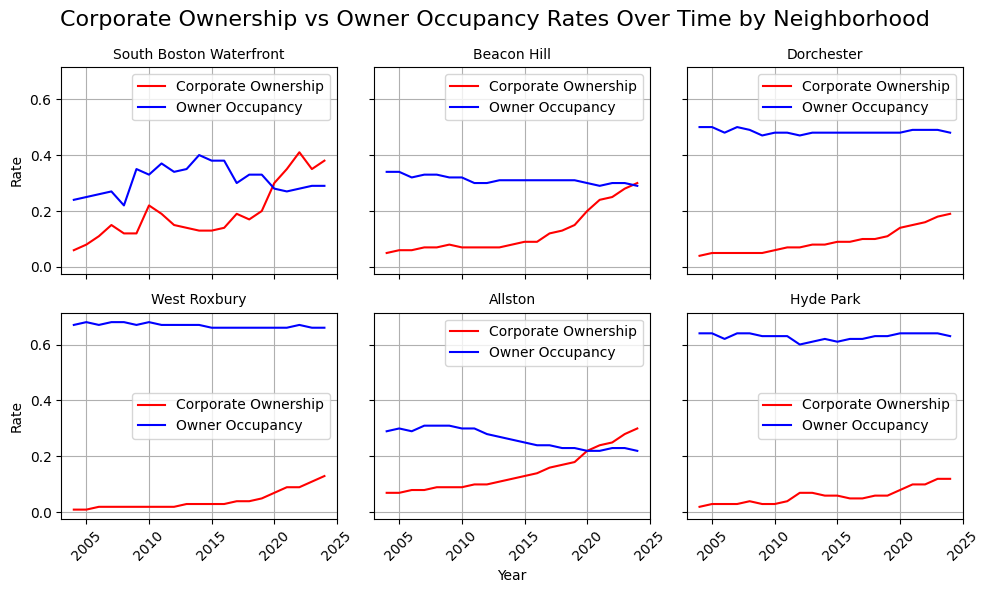

In [26]:
def plot_neighborhood_trends():
    # Read data
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    
    # Create subplot grid
    fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
    fig.suptitle('Corporate Ownership vs Owner Occupancy Rates Over Time by Neighborhood', fontsize=16)
    
    # Select 6 interesting neighborhoods
    neighborhoods = ['South Boston Waterfront', 'Beacon Hill', 'Dorchester', 
                    'West Roxbury', 'Allston', 'Hyde Park']
    
    # Plot each neighborhood
    for idx, neighborhood in enumerate(neighborhoods):
        row = idx // 3
        col = idx % 3
        
        # Get data for this neighborhood
        hood_data = df[df['Neighborhood'] == neighborhood]
        
        # Plot both lines
        axs[row, col].plot(hood_data['Year'].astype(int), hood_data['corp_own_rate'], 'r-', label='Corporate Ownership')
        axs[row, col].plot(hood_data['Year'].astype(int), hood_data['own_occ_rate'], 'b-', label='Owner Occupancy')
        
        # Add title and grid
        axs[row, col].set_title(neighborhood, fontsize=10)
        axs[row, col].grid(True)
        
        # Add legend to first subplot only
        #if idx == 0:
        axs[row, col].legend()
            
        # Add ylabel only to first column
        if col == 0:
            axs[row, col].set_ylabel('Rate')
            
        # Add xlabel only to middle plot of bottom row
        if row == 1 and col == 1:
            axs[row, col].set_xlabel('Year')
            
        # Rotate x-axis labels
        axs[row, col].tick_params(axis='x', rotation=45)
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('figs/q2/neighborhood_trends.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_neighborhood_trends()

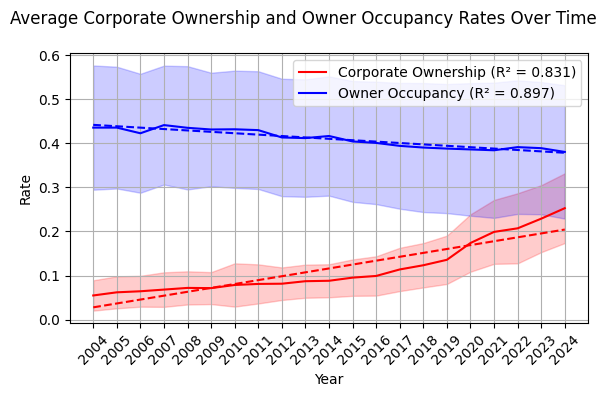

In [30]:
def plot_avg_neighborhood_trends():
    # Read data
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 4))
    fig.suptitle('Average Corporate Ownership and Owner Occupancy Rates Over Time')
    
    # Calculate mean and std for each year
    yearly_stats = df.groupby('Year').agg({
        'corp_own_rate': ['mean', 'std'],
        'own_occ_rate': ['mean', 'std']
    }).reset_index()
    
    years = yearly_stats['Year'].astype(int)
    
    # Fit trend lines and calculate R^2
    corp_fit = np.polyfit(years, yearly_stats['corp_own_rate']['mean'], 1)
    corp_line = np.poly1d(corp_fit)
    corp_r2 = np.corrcoef(years, yearly_stats['corp_own_rate']['mean'])[0,1]**2
    
    own_fit = np.polyfit(years, yearly_stats['own_occ_rate']['mean'], 1)
    own_line = np.poly1d(own_fit)
    own_r2 = np.corrcoef(years, yearly_stats['own_occ_rate']['mean'])[0,1]**2
    
    # Plot means with std shading
    ax.fill_between(years, 
                   yearly_stats['corp_own_rate']['mean'] - yearly_stats['corp_own_rate']['std'],
                   yearly_stats['corp_own_rate']['mean'] + yearly_stats['corp_own_rate']['std'],
                   color='red', alpha=0.2)
    
    ax.fill_between(years,
                   yearly_stats['own_occ_rate']['mean'] - yearly_stats['own_occ_rate']['std'],
                   yearly_stats['own_occ_rate']['mean'] + yearly_stats['own_occ_rate']['std'],
                   color='blue', alpha=0.2)
    
    # Plot means and trend lines
    ax.plot(years, yearly_stats['corp_own_rate']['mean'], 'r-', 
            label=f'Corporate Ownership (R² = {corp_r2:.3f})')
    ax.plot(years, corp_line(years), 'r--')
    
    ax.plot(years, yearly_stats['own_occ_rate']['mean'], 'b-',
            label=f'Owner Occupancy (R² = {own_r2:.3f})')
    ax.plot(years, own_line(years), 'b--')
    
    # Customize plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Rate')
    ax.grid(True)
    ax.legend()
    ax.set_xticks(years)
    ax.set_xticklabels(years.astype(int), rotation=45)
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('figs/q2/neighborhood_trends_avg.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_avg_neighborhood_trends()